# Introduction to Computer Vision with PyTorch

## 1. What is Computer Vision?

Computer vision is a field of artificial intelligence (AI) that enables machines to interpret and make decisions based on visual data - such as images and videos - much like humans do. From recognizing faces in photos to enabling self-driving cars to detect pedestrians, computer vision is at the heart of many modern applications. It combines image processing, pattern recognition, and deep learning to extract meaningful information from raw pixel data.

We will be using Convolutional Neural Networks for our tasks. We are not really going to go into the details of the architectures and functioning of these networks - it's out of the scope of this course - but you can find details at **entropic theory of information**.


Before starting to code for real, let's have a look at some important libraries we may want to use for computer vision problems.

| PyTorch module              | What does it do?                                                                                                                                                             |
|----------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [`torchvision`](https://docs.pytorch.org/vision/stable/index.html#torchvision)              | Contains datasets, model architectures and image transformations often used for computer vision problems.                                                                  |
| [`torchvision.datasets`](https://docs.pytorch.org/vision/stable/datasets.html#datasets)     | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://docs.pytorch.org/vision/stable/models.html#models-and-pre-trained-weights)       | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.                |
| [`torchvision.transforms`](https://docs.pytorch.org/vision/stable/transforms.html#transforming-and-augmenting-images)   | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.                 |


In [1]:
# torch
import torch
from torch import nn

# torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# check versions
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


### 1.1 Get a Dataset

We want to use the [`FashionMNIST`](https://docs.pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#fashionmnist) dataset from `torchvision.datasets`

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=True, # do we want the training datasets or the test?
    download=True, # do we want to download it?
    transform=ToTensor(),  # what kind of transformation do we want to apply on data?
    target_transform=None # how do we want to transform the labels (targets) ?
)

In [3]:
# Setup testing data
test_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=False, # do we want the training datasets or the test?
    download=True, # do we want to download it?
    transform=ToTensor(),  # what kind of transformation do we want to apply on data?
    target_transform=None # how do we want to transform the labels (targets) ?
)

Let's check out our data

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
# see the first training example
image, label = train_data[0]
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

Looks like the `ToTensor()` transform did its work.

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
# check the shapes
print(f"Image shape: {image.shape} <- [color_channels, height, width];\nImage label: {label}")

Image shape: torch.Size([1, 28, 28]) <- [color_channels, height, width];
Image label: 9


> **(!!) Note:** PyTorch uses the **CHW** format for images, meaning the dimensions are ordered as **Channels × Height × Width**. When working with batches of images, the format becomes **NCHW**, where **N** is the batch size. This is different from many image libraries like PIL or OpenCV, which use **HWC** format. Make sure to convert your image tensors accordingly when feeding them into a model.


Why just one color? Well, the MNIST dataset is composed of black and white images, so just one channel.

![Example of encoding an RGB image](https://github.com/MatteoFalcioni/PyTorch_basics/blob/main/imgs/03-fashion-mnist-slide.png?raw=1)

### 1.2 Visualize our Data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

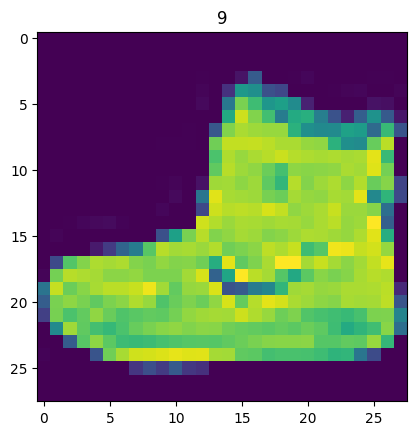

In [10]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.permute(1,2,0))  # change from CHW -> HWC (torch format -> python format)
plt.title(label)

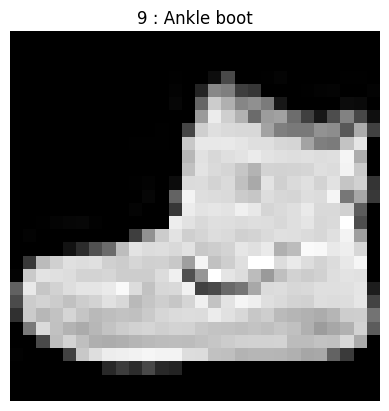

In [11]:
# in gray scale
plt.imshow(image.permute(1,2,0), cmap="gray")
plt.title(f"{label} : {class_names[label]}")
plt.axis(False);

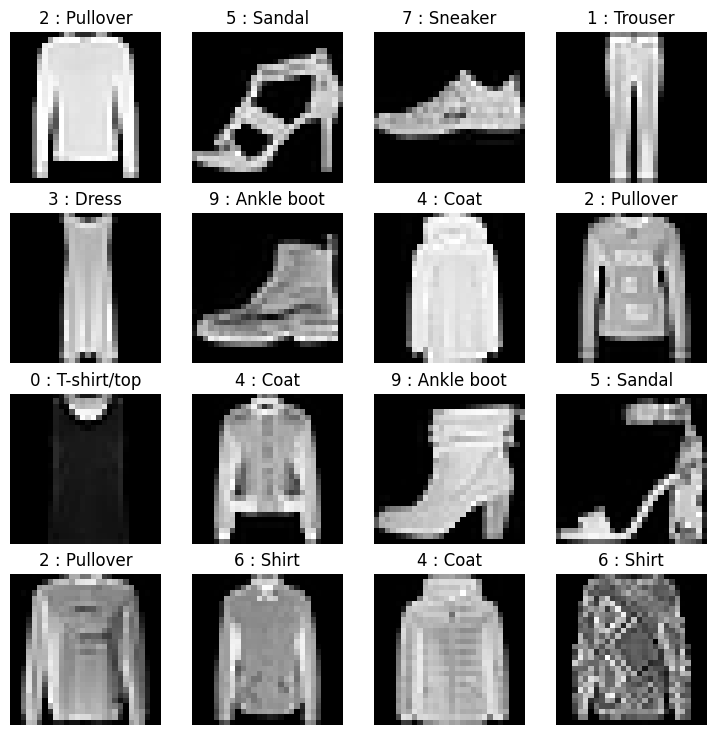

In [12]:
# Plot more (random) images
torch.manual_seed(123)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx  = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.permute(1,2,0), cmap="gray")
  plt.title(f"{label} : {class_names[label]}")
  plt.axis(False)

## 2. Prepare a Dataloader

In PyTorch, a [`Dataloader`](https://docs.pytorch.org/tutorials/beginner/basics/data_tutorial.html#datasets-dataloaders) is a powerful utility that provides an efficient way to iterate over a dataset. It wraps a dataset object (typically a subclass of `torch.utils.data.Dataset`) and returns data in manageable **batches**, optionally shuffling the data and loading it in parallel using multiple worker processes.

DataLoaders are Python iterables, which means you can loop over them using a `for` loop to retrieve batches of data. Each iteration yields a tuple (usually `(inputs, labels)`) that can be fed into a model for training or evaluation. By handling batching, shuffling, and multiprocessing under the hood, DataLoaders streamline the data pipeline and allow you to focus on model development.

We said that we want to turn our model into *batches* (or minibatches). Why is that? Because

1. The memory resources of a machine are limited, and it generally can't manage to process all the dataset at once, so deviding into batches is more computionally efficient.

2. It gives our neural network more chances to update the gradient at each epoch.

We want to create batches of size $32$ - this is a customizable number, you could use $16$, $64$, $8$...

In [13]:
from torch.utils.data import DataLoader

# batch size

BATCH_SIZE = 32

# turn datasets into iterable (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True) # shuffle train data to mix order

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False) # no need to shuffle eval data

In [14]:
# Check what's inside the Datsaloader
train_features_batch, train_labels_batch = next(iter(train_dataloader)) # since our dataloader
train_features_batch.shape, train_labels_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


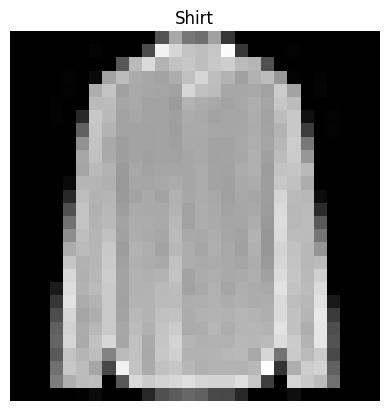

In [15]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.permute(1,2,0), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Build a baseline model

A baseline model is a simple model you will try and improve upon with subsequent models/ experiments (starts simple, then add complexity).

In [16]:
# Create a flatten layer

flatten_model = nn.Flatten()

# Get a single sample

x = train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [17]:
# Flatten the sample...
output = flatten_model(x)

print(f"Shape before flattening: {x.shape} -> shape after flattening: {output.shape}")



Shape before flattening: torch.Size([1, 28, 28]) -> shape after flattening: torch.Size([1, 784])


The `nn.Flatten()` layer literally flattens a contiguous range of dims into a tensor. By default it starts by dim=1 (not 0) and ends at the last. So if we squeeze we get

In [18]:
(output.squeeze()).shape

torch.Size([784])

We use it in order to feed this flattened output to successive linear layers, since these expect vectors, not 2D grids.

In [19]:
# Let's create the V0 model:

from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape : int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)


In [20]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

device = "cuda" if torch.cuda.is_available else "cpu"
print(f"Using device: {device}")

model_0 = FashionMNISTModelV0(input_shape=784,  # 28*28
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

Using device: cuda


In [21]:
dummy_x = torch.rand([1, 1, 28, 28]).to(device)  # 1 example of shape 1x28x28
model_0(dummy_x).shape  # 1 logit per class

torch.Size([1, 10])

### 3.1 Setup  loss, optimizer and metrics

* Since we are in multiclass classification we will use `CrossEntropyLoss()`
* For the optimizer we'll stick with `torch.optim.SGD()`
* Evaluation metric: since we are facing a classification problem, we will use accuracy.

In [22]:
# We could use torchmetrics but let's use a custom one for now, to see how we import from github

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [23]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup Loss and Optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


### 3.2 Creating a function to time our experiments

We usually want to time how long our training takes:

In [24]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end : float,
                     device : torch.device=None):
  """
  Prints difference between start and end time
  """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.2f} seconds")

In [25]:
start_time = timer()
# some code ...
end_time = timer()
print_train_time(start=start_time, end=end_time, device=device)

Train time on cuda: 0.00 seconds


### 3.3 Training Loop

In [26]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [27]:
def train_model(model, train_dataloader, test_dataloader, num_epochs, loss_fn, optimizer, device):
  """
  Trains and tests the given model, by:
  1. Looping through epochs
  2. Looping through training batches -> performs training step -> calculates train loss *per batch*
  3. Looping through test batches -> performs test step -> calculates test loss *per batch*

  Args:
    - model (torch.nn.Module): the model to train
    - train_dataloader (torch.utils.data.Dataloader): torch Dataloader containing training data
    - test_dataloader (torch.utils.data.Dataloader): torch Dataloader containing test data
    - num_epochs (int): number of epochs to train the model for
    - device () : the device to run the training on

  Returns:
    - train_losses, test_losses, accuracies (lists): lists containing training loss, test loss and accuracies, averaged over batches

  """
  # to store data
  train_losses, test_losses, accuracies = [], [], []

  # Train and test loop
  for epoch in tqdm(range(num_epochs)): # loop through epochs

    print(f"------------\nEpoch [{epoch}/{num_epochs}]")

    train_loss = 0  # to accumulate loss *per batch*

    ## Train loop through batches
    for batch, (X_train, y_train) in enumerate(train_dataloader):

      X_train = X_train.to(device)
      y_train = y_train.to(device)

      model.train()

      # 1. forward pass
      y_pred = model(X_train)

      # 2. compute loss
      loss = loss_fn(y_pred, y_train)
      train_loss += loss  # accumulate train loss

      # 3. zero out the gradient
      optimizer.zero_grad()

      # 4. backward pass
      loss.backward()

      # 5. step the optimizer
      optimizer.step()

      if batch % 400 == 0:
        print(f"Processed {batch * len(X_train) / len(train_dataloader.dataset):.3f}% of samples")

    # Divide total train loss by the length of the train dataloader to average over batches
    train_loss /= len(train_dataloader)

    ## Testing
    test_loss = 0
    accuracy = 0

    model.eval()
    with torch.no_grad():

      ## Test loop through batches
      for X_test, y_test in test_dataloader:
        X_test = X_test.to(device)
        y_test = y_test.to(device)

        # forward pass
        test_pred = model(X_test)

        # Compute and cumulate loss
        test_loss += loss_fn(test_pred, y_test)
        accuracy += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=-1)) # careful, preds need argmax to go from logits to preds

      # average test loss and accuracy over batches
      test_loss /= len(test_dataloader)
      accuracy /= len(test_dataloader)

    # keep track of losses and accuracy over epochs
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    accuracies.append(accuracy)
    print(f">>> Accuracy: {accuracy}")

  return train_losses, test_losses, accuracies


In [28]:
# Let's train!

NUM_EPOCHS = 5

start_time = timer()
train_losses, test_losses, accuracies = train_model(model=model_0,
                                                    train_dataloader=train_dataloader,
                                                    test_dataloader=test_dataloader,
                                                    num_epochs=NUM_EPOCHS,
                                                    loss_fn=loss_fn,
                                                    optimizer=optimizer,
                                                    device=device)
end_time = timer()
print_train_time(start=start_time, end=end_time, device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

------------
Epoch [0/5]
Processed 0.000% of samples
Processed 0.213% of samples
Processed 0.427% of samples
Processed 0.640% of samples
Processed 0.853% of samples
>>> Accuracy: 82.03873801916933
------------
Epoch [1/5]
Processed 0.000% of samples
Processed 0.213% of samples
Processed 0.427% of samples
Processed 0.640% of samples
Processed 0.853% of samples
>>> Accuracy: 83.19688498402556
------------
Epoch [2/5]
Processed 0.000% of samples
Processed 0.213% of samples
Processed 0.427% of samples
Processed 0.640% of samples
Processed 0.853% of samples
>>> Accuracy: 83.42651757188499
------------
Epoch [3/5]
Processed 0.000% of samples
Processed 0.213% of samples
Processed 0.427% of samples
Processed 0.640% of samples
Processed 0.853% of samples
>>> Accuracy: 83.74600638977635
------------
Epoch [4/5]
Processed 0.000% of samples
Processed 0.213% of samples
Processed 0.427% of samples
Processed 0.640% of samples
Processed 0.853% of samples
>>> Accuracy: 83.2667731629393
Train time on cu

In [29]:
# print losses
import matplotlib.pyplot as plt

def print_losses(train_losses, test_losses, start_epoch=1):
  """
  Prints losses and accuracy
  """

  num_epochs = range(start_epoch, len(train_losses) + start_epoch)

  plt.figure(figsize=(10,7))
  plt.title("Train Loss vs Test Loss")
  plt.plot(num_epochs, train_losses, label="Train loss")
  plt.plot(num_epochs, test_losses, label="Test loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss values")
  plt.legend()


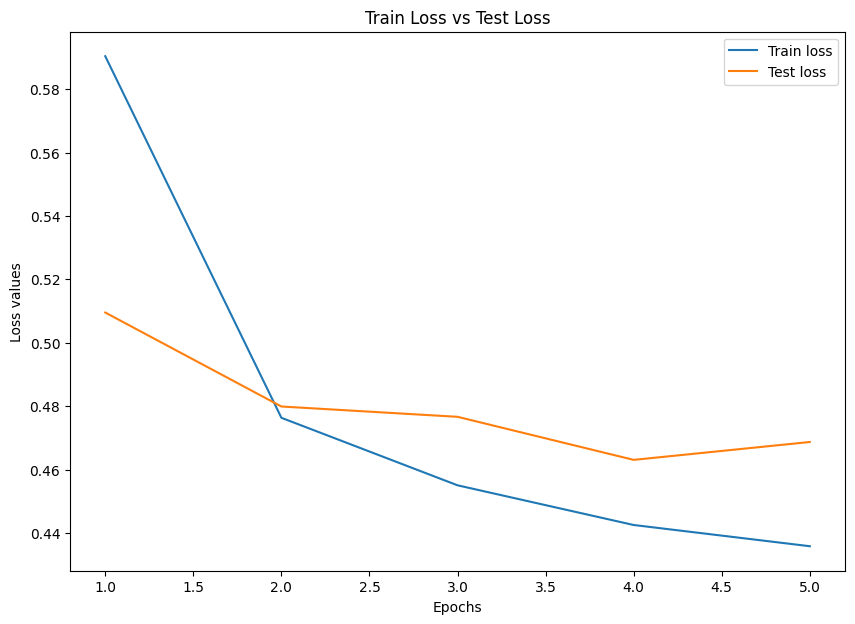

In [30]:
print_losses(train_losses, test_losses)

We slightly overfitted towards the end of training... but let's compute predicitons anyway to see if our model is outputting something good.

## 4. Make predictions

We will functionize the evaluation loop as well, in order to be able to use it for the next models.

In [31]:
from torch.utils.data import DataLoader

torch.manual_seed(42)
torch.cuda.manual_seed(42)

def eval_model(model: nn.Module,
               eval_dataloader: DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device):
  """
  Returns a dictionary of model predicting on eval_dataloader
  """
  loss, acc = 0, 0
  model.eval()

  with torch.inference_mode():

    for X, y in eval_dataloader:
      X = X.to(device)
      y = y.to(device)

      # make predictions
      y_pred = model(X)

      # Accumulate loss and accuracy per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Average loss and accuracy over batches
    loss /= len(eval_dataloader)
    acc /= len(eval_dataloader)

  return{"model_name": model.__class__.__name__,  # works when model was created with a class
         "model_loss": loss.item(),
         "model_acc": acc}




In [32]:
# calculate model 0 results on test dataset

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

model_0_results = eval_model(model=model_0,
                             eval_dataloader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_0_results

Using device: cuda


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46869388222694397,
 'model_acc': 83.2667731629393}

## 5. Improvements: Add Non-Linearity

We have good results, but trust me, we can do way better. Let's add non-linearity to our code.

In [33]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               output_shape: int,
               hidden_units: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),  # don't forget to flatten in convolutional NN!
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [34]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

model_1

Using device: cuda


FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

## 6. Functionize Everything

Let's functionize once and for good our training and testing loops:

In [35]:
# Let's adapt the train function to use the eval function we created earlier

def train_step(model: torch.nn.Module,
               train_loader: DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):
  """
  Performs a training step with a given model
  """
  train_loss = 0
  train_acc = 0

  # training mode
  model.train()

  for batch, (X, y) in enumerate(train_loader):

    # put data on target device
    X, y = X.to(device), y.to(device)

    # forward pass
    y_pred = model(X)

    # compute the loss
    loss = loss_fn(y_pred, y)
    # accumulate loss and acc
    train_loss += loss.item()
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    # zero out the gradient
    optimizer.zero_grad()

    # backward pass
    loss.backward()

    # optimizer step
    optimizer.step()

  # average loss and accuracy over samples
  train_loss /= len(train_loader)
  train_acc /= len(train_loader)

  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%\n")

  return train_loss, train_acc

In [36]:
def test_step(model: torch.nn.Module,
              test_loader: DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):
  """
  performs a testing loop step on a given model
  """

  # eval mode
  model.eval()

  test_loss = 0
  test_acc = 0

  with torch.no_grad():
    for X, y in test_loader:

      # send to device
      X, y = X.to(device), y.to(device)

      # get predictions
      y_pred = model(X)

      # accumulate losses
      test_loss += loss_fn(y_pred, y).item()
      test_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # average metrics
    test_loss /= len(test_loader)
    test_acc /= len(test_loader)

    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

    return test_loss, test_acc

In [37]:
from typing import Callable, Dict, List, Tuple

def train_epochs(model: torch.nn.Module,
                 train_loader: DataLoader,
                 test_loader: DataLoader,
                 loss_fn: torch.nn.Module,
                 optimizer: torch.optim.Optimizer,
                 accuracy_fn : Callable[[torch.Tensor, torch.Tensor], float],
                 device: torch.device,
                 n_epochs: int
                 ) -> Dict[str, List[float]]:
  """
  Performs training and evaluation of the given model during several epochs.
  """

  # lists to store metrics
  train_losses, train_accuracies, test_losses, test_accuracies = [], [], [], []

  for epoch in tqdm(range(n_epochs), desc="Training and testing..."):

    print(f"\nEpoch {epoch+1} ------")
    # training step
    train_loss, train_acc = train_step(model=model,
                                        train_loader=train_loader,
                                        loss_fn=loss_fn,
                                        optimizer=optimizer,
                                        accuracy_fn=accuracy_fn,
                                        device=device)

    # test step
    test_loss, test_acc = test_step(model=model,
                                    test_loader=test_loader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

  # return a dictionary of metrics
  return {"train_loss": train_losses,
          "train_acc": train_accuracies,
          "test_loss": test_losses,
          "test_acc": test_accuracies}



In [38]:
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.01)

loss_fn = nn.CrossEntropyLoss()

metrics_dict = train_epochs(model=model_1,
                            train_loader=train_dataloader,
                            test_loader=test_dataloader,
                            loss_fn=loss_fn,
                            optimizer=optimizer,
                            accuracy_fn=accuracy_fn,
                            device=device,
                            n_epochs=3)

metrics_dict

Training and testing...:   0%|          | 0/3 [00:00<?, ?it/s]


Epoch 1 ------
Train loss: 1.21830 | Train acc: 55.77%

Test loss: 0.77912 | Test acc: 73.25%


Epoch 2 ------
Train loss: 0.66939 | Train acc: 76.62%

Test loss: 0.62270 | Test acc: 78.24%


Epoch 3 ------
Train loss: 0.56231 | Train acc: 80.36%

Test loss: 0.56699 | Test acc: 80.02%



{'train_loss': [1.2183043938954672, 0.6693922449111939, 0.5623107535759608],
 'train_acc': [55.77333333333333, 76.625, 80.35666666666667],
 'test_loss': [0.7791212929513889, 0.6226965515567853, 0.5669892140851615],
 'test_acc': [73.25279552715655, 78.24480830670926, 80.02196485623003]}

Wait, what? We didn't surpass the non linear model! Hhhmmmm...